In [1]:
from tensorflow.keras import applications, models, layers, backend, metrics, callbacks, utils

In [2]:
efficient = applications.EfficientNetB2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3),
)

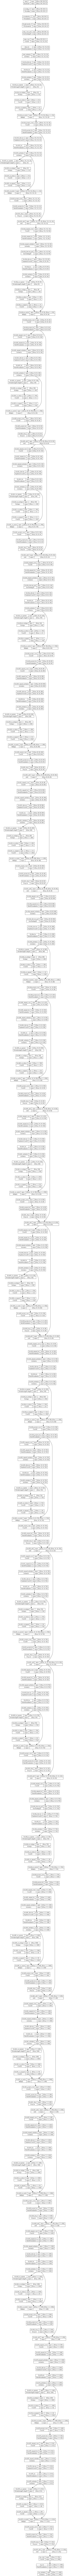

In [7]:
utils.plot_model(efficient, show_shapes=True,)

In [4]:
img_shape = (224,224,3)

left_input = layers.Input(img_shape)
right_input = layers.Input(img_shape)

# Load efficient net
efficient = applications.EfficientNetB2(
    weights="imagenet",
    include_top=False,
    input_shape=img_shape,
)
efficient.trainable=False

# Set layer trainable
set_trainable = False

for layer in efficient.layers:
    if layer.name == 'block6d_se_excite':
        set_trainable = True
    if set_trainable:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

# Convolutional Neural Network
cnn = models.Sequential()
cnn.add(efficient)
cnn.add(layers.GlobalAveragePooling2D())
cnn.add(layers.Dense(48, activation='relu'))

# Generate the encodings (feature vectors) for the two images
left_feats = cnn(left_input)
right_fits = cnn(right_input)

# Add a customized layer to compute the difference between the encodings
difference_layer = layers.Lambda(lambda tensors:backend.abs(tensors[0] - tensors[1]))
distance = difference_layer([left_feats, right_fits])

# Add a dense layer with a sigmoid unit to generate the similarity score
prediction = layers.Dense(1,activation='sigmoid')(distance)

# Connect the inputs with the outputs
model = models.Model(inputs=[left_input,right_input],outputs=prediction)

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy", metrics.Recall(), metrics.Precision()])


In [6]:
for i in range(20):
    print(efficient.layers[-i].trainable)

False
True
False
True
True
True
False
True
True
True
True
True
True
True
False
True
True
False
True
False
